In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit([[0], [1]])   # 0 = no tumor, 1 = tumor

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [36]:
data = []
paths = []
result = []

for r, d, f in os.walk("archive/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if (img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]])[0])

In [37]:
paths = []

for r, d, f in os.walk("archive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if (img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]])[0])

In [38]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [39]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 139


In [40]:
x = np.array(data, dtype=np.float32) / 255.0
y = np.vstack(result).astype(np.float32)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [47]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 111


In [48]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 28


In [49]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax')
print(model.summary())

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [50]:
history = model.fit(x_train, y_train, batch_size=40, epochs=30, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 804ms/step - loss: 37.3044 - val_loss: 0.5825
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - loss: 20.7421 - val_loss: 0.6573
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - loss: 11.3955 - val_loss: 0.6218
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step - loss: 4.6092 - val_loss: 0.5273
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step - loss: 4.5499 - val_loss: 0.5860
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 3.8134 - val_loss: 0.7540
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 667ms/step - loss: 4.7637 - val_loss: 0.9347
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 702ms/step - loss: 1.9195 - val_loss: 1.1700
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 789ms/step - loss: 1.4179 - val_loss: 1.5287
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 711ms/step - loss: 0.8766 - val_loss: 1.9824
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - loss: 0.4967 - val_loss: 2.5052
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 1.3030 - val

In [51]:
print(type(x_train), x_train.dtype)
print(type(y_train), y_train.dtype)

<class 'numpy.ndarray'> float32
<class 'numpy.ndarray'> float32


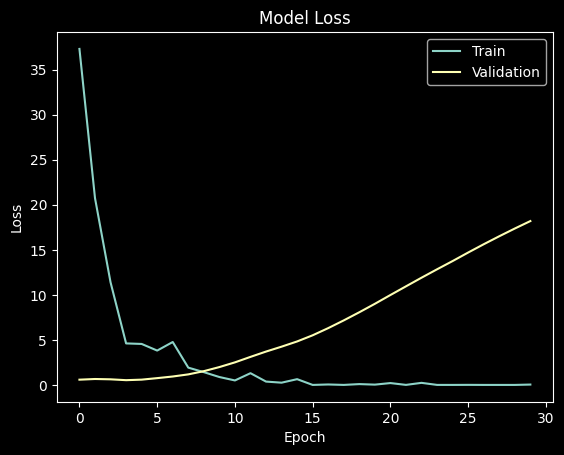

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

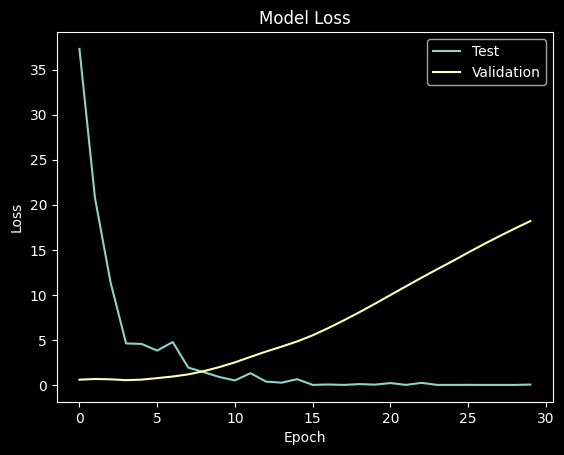

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [57]:
def names(number):
    if number == 1:
        return 'Its a Tumor'
    else:
        return 'No, Its not a Tumor'

100.0% Confidence No, Its not a Tumor


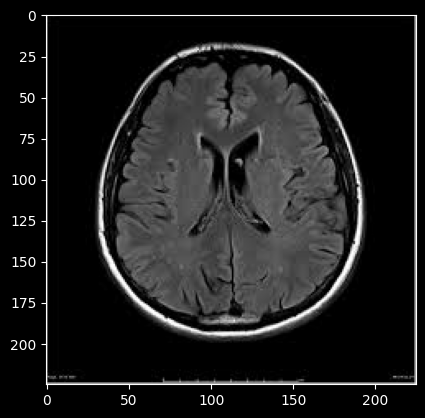

In [60]:
from matplotlib.pyplot import imshow
img = Image.open(r"archive/brain_tumor_dataset/no/5 no.jpg")
X = np.array(img.resize((128, 128)))
X = X.reshape(1, 128, 128, 3)
res = model.predict_on_batch(X)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + "% Confidence " + names(classification))


In [6]:
heading_title = "Brain tumor classification app by KKC"

In [5]:
num_examples = 2

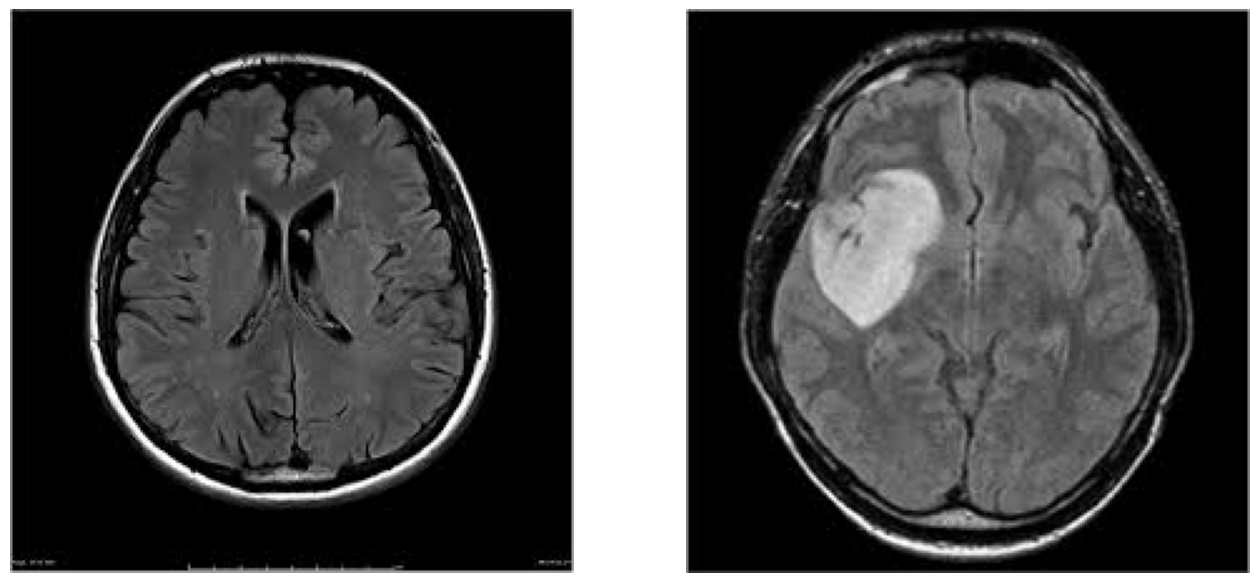

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

examples = [
    "archive/brain_tumor_dataset/no/5 no.jpg",
    "archive/brain_tumor_dataset/yes/Y4.jpg"
]

for p in examples:
    if not os.path.isfile(p):
        raise FileNotFoundError(f"Invalid image path: {p}")

plt.figure(figsize=(16, 8))
for i, p in enumerate(examples):
    img = Image.open(p).convert("RGB")
    plt.subplot(1, len(examples), i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()


In [10]:
desc = "Brain tumor app. Let's learn!"
long_desc = "Select an image or upload one to predict if brain tumor is present or not"

In [11]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

# Now you can use the selected_theme variable when you create your Gradio interface

In [12]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result

In [ ]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)

c:\Python312\Lib\site-packages\gradio\interface.py:171: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  super().__init__(


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\gradio\queueing.py", line 763, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\gradio\blocks.py", line 2125, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\gradio\blocks.py", line 1607, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^